In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
from functools import reduce

import subprocess as sp 
from subprocess import Popen
import os

import matplotlib.animation as animation
import matplotlib.patches as patches
from IPython.display import HTML

import sys 
sys.path.append('/home/akh/aesthetic/soni/datamovies_y21/modules')

import writeCmixSco_WT_ac as wRT_wt

In [90]:
#load the hydrologic timeseries data. 
#We have precipication at the HJ Andrews Experimental Forest, and then discharge at two tributaries of the Mckenzie with different percentages of upstream young basalt

#Lookout Creek is "old cascades" endmember, with no young rocks in the catchment 
#Clear Lake is the "young cascades" endmember, largely fed by springs from recent lava flows

dfp0 = pd.read_excel ("Precip_HJASite101.xlsx", parse_dates=[7])
#print (df)
print("we have " + str(dfp0.size) + " precip measurements")

dfc0 = pd.read_excel ("ClearLake.xls",header=27)
#print (df)
print("we have " + str(dfc0.size) + " data entries (uncorrected discharge) at Clear Lake")

#for this one we use the parse_dates function to combine columnes into a datetime column at the outset! 
dfl0 = pd.read_excel ("LOOKOUT_GSLOOK.xlsx", parse_dates= {"date" : ["year","month","day"]})
#dfl0 = pd.read_excel ("Uncorrected_Discharge/HF00402_LOOKOUT.xlsx",sheet_name='HJA', parse_dates= {"date" : ["year","month","day"]})
#print (df)
print("we have " + str(dfl0.size) + " data entries (uncorrected discharge) at Lookout Ck")

print(dfl0.columns)

print(dfc0.columns)
print(dfp0.columns)

we have 222332 precip measurements
we have 175590 data entries (uncorrected discharge) at Clear Lake
we have 275297 data entries (uncorrected discharge) at Lookout Ck
Index(['date', 'STCODE', 'FORMAT', 'SITECODE', 'WATERYEAR', 'MEAN_Q_cfs',
       'MAX_Q', 'MIN_Q', 'MEAN_Q_AREA (cfs/mi^2)', 'TOTAL_Q_AREA (inches)',
       'ESTCODE'],
      dtype='object')
Index(['agency_cd', 'site_no', 'date', 'discharge', '01_00060_00003_cd'], dtype='object')
Index(['DBCODE', 'ENTITY', 'SITECODE', 'PRECIP_METHOD', 'HEIGHT', 'QC_LEVEL',
       'PROBE_CODE', 'date', 'PRECIP_TOT_DAY', 'PRECIP_TOT_FLAG',
       'EVENT_CODE'],
      dtype='object')


In [91]:
#find common time frame between the datasets
start = '1995-08-01'
end = '1996-08-01'

conditionP = (dfp0['date'] > start) & (dfp0['date'] <= end)
dp=dfp0.loc[conditionP]
conditionL = (dfl0['date'] > start) & (dfl0['date'] <= end)
dl=dfl0.loc[conditionL]
conditionC = (dfc0['date'] > start) & (dfc0['date'] <= end)
dc=dfc0.loc[conditionC]

print(sum(conditionP==True),sum(conditionC==True),sum(conditionL==True))
print(dp.shape[0],dc.shape[0],dl.shape[0])


366 366 366
366 366 366


366
366


/home/akh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/home/akh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Text(0, 0.5, 'ln(dQ)')

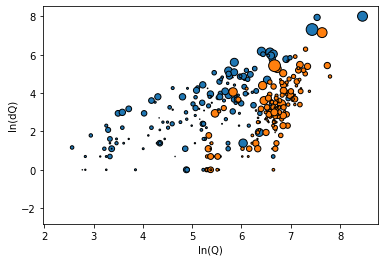

In [204]:
fig,ax=plt.subplots()
dQl=abs(np.diff(dl['MEAN_Q_cfs'].values, prepend=0))
dQc=abs(np.diff(dc['discharge'].values, prepend=0))
print(len(dQl))
print(len(dc))

ax.scatter(np.log(dl['MEAN_Q_cfs']),np.log(dQl), edgecolor='black', s=dp['PRECIP_TOT_DAY'])
ax.scatter(np.log(dc['discharge']), np.log(dQc), edgecolor='black', s=dp['PRECIP_TOT_DAY'])
ax.set_xlabel('ln(Q)')
ax.set_ylabel('ln(dQ)')

364 days animating
notes/frames per second 2


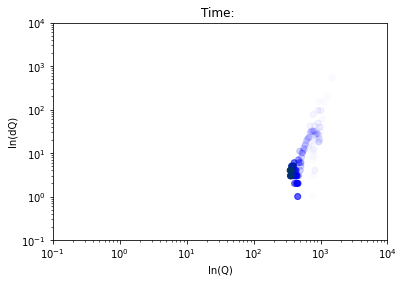

In [151]:



from matplotlib.colors import LinearSegmentedColormap

fig,ax=plt.subplots()

ax.set_xlabel('ln(Q)')
ax.set_ylabel('ln(dQ)')
ax.set_yscale('log')
ax.set_xscale('log')
        
ax.set_ylim([0.1, 10**8.5])
ax.set_xlim([0.1,10**9])
Qc=np.array(dc['discharge'].values)
Ql=np.array(dl['MEAN_Q_cfs'].values)
clist=[]
llist=[]
colors=[[0,0,1,0], [0,0,1,0.5], [0,0.2,0.4,1]]
cmap=LinearSegmentedColormap.from_list("", colors)
x_vals=[]
y_vals=[]
intensity=[] #np.array([1])

scatter=ax.scatter(x_vals, y_vals, c=[], cmap=cmap, vmin=0, vmax=1) #, s=dp['PRECIP_TOT_DAY'])

t=np.arange(1,365)#len(dQc)-2)

print(len(t), "days animating")
print("notes/frames per second", 2)
interval=notelength*1000
i=0
def update(t):
    global x_vals, y_vals, i, intensity, scatter
    x_vals.extend([Qc[i]])
    y_vals.extend([dQc[i]])
    
    scatter.set_offsets(np.c_[x_vals, y_vals])
    
    intensity=np.concatenate((np.array(intensity)*.96, np.array([1])))

    scatter.set_array(np.array(intensity))

    ax.set_title('Time: '%t)
    #print(i, intensity, x_vals,y_vals)
    i=i+1
    
ani=animation.FuncAnimation(fig, update, frames=t, interval=interval)

#HTML(ani.to_html5_video())
ani.save("hydro04252021.mp4")

#for i in range(len(dQc)):
    
#    dQQc=[Qc[i], dQc[i]]
#    cdot=patches.Circle(dQQc,fc="orange", ec="black")
#    clist.append(cdot)
#    dQQl=[Ql[i], dQl[i]]
#    ldot=patches.Circle(dQQl, fc='blue', ec="black")
#    llist.append(ldot)

In [187]:
def dayAlpha(day):
    a1=np.zeros(365)
    d=np.linspace(0,1,day)
    a1[:day]=d
    return a1


notelength=1/4 #s
print(np.log10(min(dc['discharge'])))
print(np.log10(min(dl['MEAN_Q_cfs'])))

print(max(np.log10(dQc)))
print(max(np.log10(dQl)))

2.298853076409707
0.9912260756924949
3.1075491297446862
3.4785664955938436


/home/akh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
/home/akh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


364 days animating
notes/frames per second 2


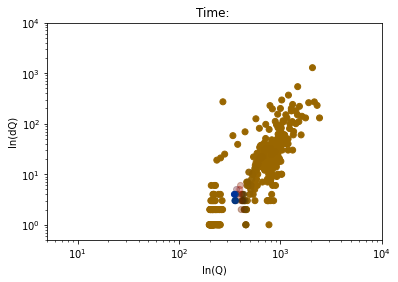

In [167]:



from matplotlib.colors import LinearSegmentedColormap

fig,ax=plt.subplots()

ax.set_xlabel('log(Q)')
ax.set_ylabel('log(dQ)')
ax.set_yscale('log')
ax.set_xscale('log')
        
ax.set_ylim([0.1, 10**8.5])
ax.set_xlim([2,10**8])
Qc=np.array(dc['discharge'].values)
Ql=np.array(dl['MEAN_Q_cfs'].values)
Pre=np.array(dp["PRECIP_TOT_DAY"].values)
clist=[]
llist=[]
colors=[[0,0,1,0], [0,0,1,0.5], [0,0.2,0.4,1]]
cmap=LinearSegmentedColormap.from_list("", colors)
x_vals=[]
y_vals=[]
intensity=[] #np.array([1])

scatter=ax.scatter(x_vals, y_vals, c=[], cmap=cmap, vmin=0, vmax=1) #, s=dp['PRECIP_TOT_DAY'])

t=np.arange(1,365)#len(dQc)-2)

print(len(t), "days animating")
print("notes/frames per second", 2)
interval=notelength*1000
i=0
def update(t):
    global x_vals, y_vals, i, intensity, scatter
    x_vals.extend([Qc[i]])
    y_vals.extend([dQc[i]])

    
    scatter.set_offsets(np.c_[x_vals, y_vals])
    
    intensity=np.concatenate((np.array(intensity)*.96, np.array([1])))

    scatter.set_array(np.array(intensity))

    ax.set_title('Time: '%t)
    #print(i, intensity, x_vals,y_vals)
    i=i+1
    
ani=animation.FuncAnimation(fig, update, frames=t, interval=interval)

#HTML(ani.to_html5_video())
ani.save("hydro04252021.mp4")

#for i in range(len(dQc)):
    
#    dQQc=[Qc[i], dQc[i]]
#    cdot=patches.Circle(dQQc,fc="orange", ec="black")
#    clist.append(cdot)
#    dQQl=[Ql[i], dQl[i]]
#    ldot=patches.Circle(dQQl, fc='blue', ec="black")
#    llist.append(ldot)

364 days animating
notes/frames per second 4.0


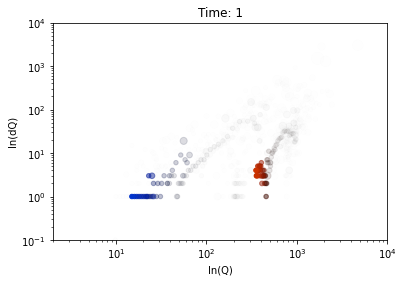

In [210]:

notelength=1/4
from matplotlib.colors import LinearSegmentedColormap

fig,ax=plt.subplots()

ax.set_xlabel('ln(Q)')
ax.set_ylabel('ln(dQ)')
ax.set_yscale('log')
ax.set_xscale('log')
        
ax.set_ylim([.1, 10**4])
ax.set_xlim([2,10**4])
Qc=np.array(dc['discharge'].values+.001)
Ql=np.array(dl['MEAN_Q_cfs'].values+.001)
Pre=np.array(dp['PRECIP_TOT_DAY'].values)
clist=[]
llist=[]
colors=[ [.8,.2,0,1], [.6,.1,0,.5], [0,0,0,0], [0,.1,0.6,0.5], [0,.2,0.8,1]]
cmap=LinearSegmentedColormap.from_list("", colors)
x_vals=[]
y_vals=[]
intensity=[] #np.array([1])
size=[]

scatter=ax.scatter(x_vals, y_vals, c=[], cmap=cmap, vmin=-1, vmax=1) #, s=dp['PRECIP_TOT_DAY'])

t=np.arange(1,365)#len(dQc)-2)

print(len(t), "days animating")
print("notes/frames per second", 1/notelength)
interval=notelength*1000
i=0

def update2(t):
    global x_vals, y_vals, i, intensity, scatter
    x_vals.extend([Ql[i], Qc[i]])
    y_vals.extend([dQl[i], dQc[i]])
    size.extend([Pre[i]+20,Pre[i]+20])
    #size=np.ones(len(x_vals))*(Pre[i]+15)
    scatter.set_offsets(np.c_[x_vals, y_vals])
    scatter.set_sizes(size)
    
    intensity=np.concatenate((np.array(intensity)*.95, np.array([1,-1])))

    scatter.set_array(np.array(intensity))

    ax.set_title('Time: %0.0f' %t)
    #print(i, intensity, x_vals,y_vals)
    i=i+1
    
ani=animation.FuncAnimation(fig, update2, frames=t, interval=interval)

#HTML(ani.to_html5_video())
ani.save("hydro04272021_bOTH.mp4")

#for i in range(len(dQc)):
    
#    dQQc=[Qc[i], dQc[i]]
#    cdot=patches.Circle(dQQc,fc="orange", ec="black")
#    clist.append(cdot)
#    dQQl=[Ql[i], dQl[i]]
#    ldot=patches.Circle(dQQl, fc='blue', ec="black")
#    llist.append(ldot)